In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,NaN,72.0,35.0,NaN,NaN,0.627,NaN
1,NaN,85.0,66.0,29.0,NaN,NaN,0.351,NaN
2,8.0,183.0,NaN,0.0,NaN,NaN,0.672,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	76
float64		column 2	76
float64		column 3	114
float64		column 4	38
float64		column 5	266
float64		column 6	266
float64		column 7	114
float64		column 8	266


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,692.000000,692.000000,654.000000,730.000000,502.000000,502.000000,654.000000,502.000000
mean,3.760116,120.593931,69.036697,20.521918,76.091633,31.901793,0.461780,33.067729
std,3.296751,31.919102,19.157808,15.921108,104.438617,7.701628,0.309563,11.688719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.150000,0.364500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,120.000000,36.375000,0.606500,40.000000
max,15.000000,199.000000,122.000000,99.000000,600.000000,59.400000,2.288000,81.000000


<AxesSubplot:>

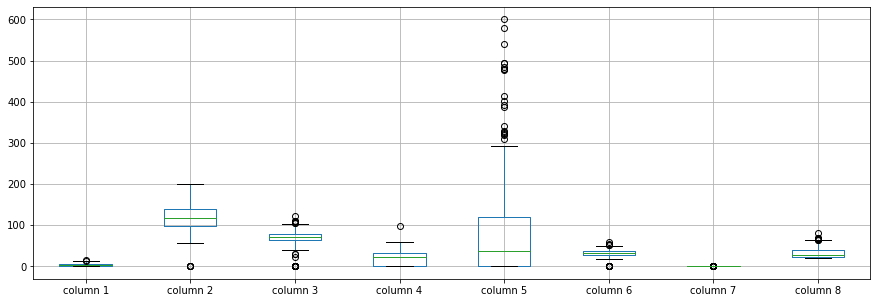

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.760116
column 2    120.593931
column 3     69.036697
column 4     20.521918
column 5     76.091633
column 6     31.901793
column 7      0.461780
column 8     33.067729
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.124463,0.156536,-0.100175,-0.073423,0.018465,-0.050674,0.521993
column 2,0.124463,1.000000,0.127202,0.049177,0.273946,0.166595,0.074306,0.279028
column 3,0.156536,0.127202,1.000000,0.205632,0.020760,0.196311,0.038606,0.249749
column 4,-0.100175,0.049177,0.205632,1.000000,0.415171,0.346947,0.146838,-0.158569
column 5,-0.073423,0.273946,0.020760,0.415171,1.000000,0.142528,0.199530,-0.095311
column 6,0.018465,0.166595,0.196311,0.346947,0.142528,1.000000,0.089103,0.035557
column 7,-0.050674,0.074306,0.038606,0.146838,0.199530,0.089103,1.000000,0.052788
column 8,0.521993,0.279028,0.249749,-0.158569,-0.095311,0.035557,0.052788,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+76,8+76+76,8+76+76+76,8+76+76+76+76,8+76+76+76+76+76,8+76+76+76+76,8+76+76+76,8+76+76,8+76,8], vae_layer = False, seed = 76)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 324.4629815419515
Epoch: 1 , loss: 325.7748425801595
Epoch: 2 , loss: 325.305459022522
Epoch: 3 , loss: 319.7703450520833
Epoch: 4 , loss: 302.4193464914958
Epoch: 5 , loss: 295.9635121027629
Epoch: 6 , loss: 290.68449783325195
Epoch: 7 , loss: 283.4613494873047
Epoch: 8 , loss: 281.40639813741046
Epoch: 9 , loss: 276.4270289738973
Epoch: 10 , loss: 266.18887646993
Epoch: 11 , loss: 262.391783396403
Epoch: 12 , loss: 251.66136614481607
Epoch: 13 , loss: 250.05723222096762
Epoch: 14 , loss: 244.48644860585532
Epoch: 15 , loss: 236.2234846750895
Epoch: 16 , loss: 234.49363803863525
Epoch: 17 , loss: 223.6110699971517
Epoch: 18 , loss: 227.8927043279012
Epoch: 19 , loss: 217.11299165089926
Epoch: 20 , loss: 223.17425791422525
Epoch: 21 , loss: 211.48644320170084
Epoch: 22 , loss: 216.3480544090271
Epoch: 23 , loss: 208.71032238006592
Epoch: 24 , loss: 206.786039352417
Epoch: 25 , loss: 206.317733446757
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,-43.595314,0.000000,0.0,59.335590,-3.623245,0.0,-19.265039
1,3.053251,0.000000,0.000000,0.0,62.540749,4.637761,0.0,1.590710
2,0.000000,0.000000,-45.715607,0.0,17.604372,-14.869131,0.0,-23.149283
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
764,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
766,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2529.1086088474935, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.4378213841383113

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,104.404686,72.000000,35.0,59.335590,29.976755,0.627,30.734961
1,4.053251,85.000000,66.000000,29.0,62.540749,31.237761,0.351,32.590710
2,8.000000,183.000000,18.284393,0.0,17.604372,8.430869,0.672,8.850717
3,1.000000,89.000000,66.000000,23.0,94.000000,28.100000,0.167,21.000000
4,0.000000,137.000000,40.000000,35.0,168.000000,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.0,180.000000,32.900000,0.171,63.000000
764,2.000000,122.000000,70.000000,27.0,0.000000,36.800000,0.340,27.000000
765,5.000000,121.000000,72.000000,23.0,112.000000,26.200000,0.245,30.000000
766,1.000000,126.000000,60.000000,0.0,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AE_20.xlsx", index=False, header=False)